### simple Kmeans clustering of Randomly generated Dataset

In [2]:
import sklearn 
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 

import random

import warnings 
warnings.filterwarnings("ignore")

In [3]:
# generate randomly data 
# wich will be artificially in 3 seperate clusters 

data_1= np.array([[random.randint(1,400) for i in range(2)]for j in range (50)], dtype = np.float64)

data_2= np.array([[random.randint(300,700) for i in range(2)]for j in range (50)], dtype = np.float64)

data_3= np.array([[random.randint(600,900) for i in range(2)]for j in range (50)], dtype = np.float64)

data = np.append(np.append(data_1, data_2, axis=0), data_3, axis=0)

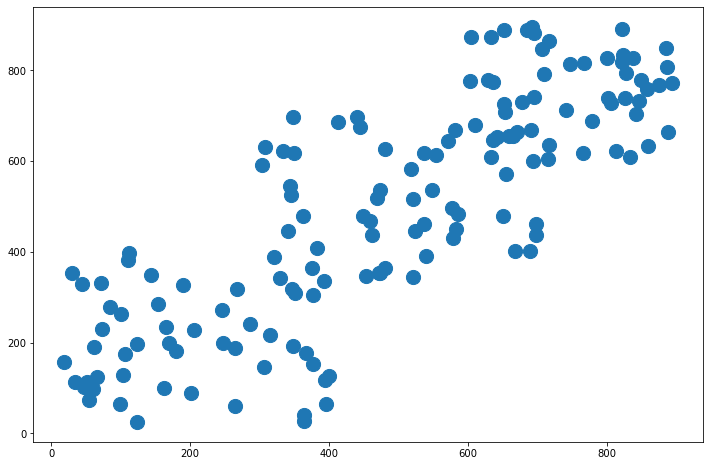

In [4]:
# visualize the data as a 2D scatter plot 

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(data[:,0],data[:,1], s=200)

In [5]:
# assign labels to each set of 50 points 

labels1 = np.array([0 for i in range (50)])
labels2 = np.array([1 for i in range (50)])
labels3 = np.array([2 for i in range (50)])

labels = np.append(np.append(labels1, labels2, axis=0), labels3, axis=0)

In [6]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
#we put labels and data all in a tabular form
#GD : generated data
GD = pd.DataFrame({'data_x':data[:,0],'data_y':data[:,1], 'labels':labels})
GD.sample(10)

,data_x,data_y,labels
125,603.0,777.0,2
104,706.0,847.0,2
87,578.0,431.0,1
37,265.0,60.0,0
132,691.0,669.0,2
113,823.0,833.0,2
16,306.0,147.0,0
106,767.0,817.0,2
6,60.0,98.0,0
89,689.0,401.0,1


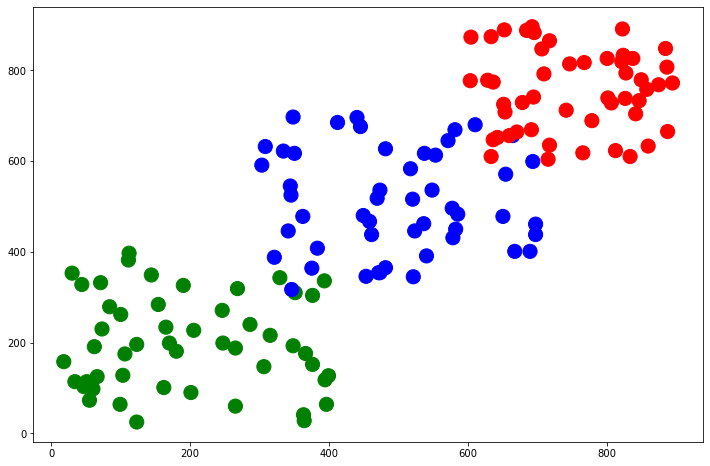

In [8]:
# visualizing with colored clusters
colors = ['green','blue','red']
plt.figure(figsize=(12,8))

plt.scatter(GD['data_x'],GD['data_y'], c=GD['labels'], s=200, cmap=matplotlib.colors.ListedColormap(colors))

In [9]:
#  setting Kmeans estimator 
model = KMeans(n_clusters = 3, max_iter = 10000).fit(data)

In [10]:
 model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# cordinates of of the centroids 
centroids = model.cluster_centers_
centroids

array([[194.98      , 198.62      ],
       [741.25925926, 746.74074074],
       [482.93478261, 499.02173913]])

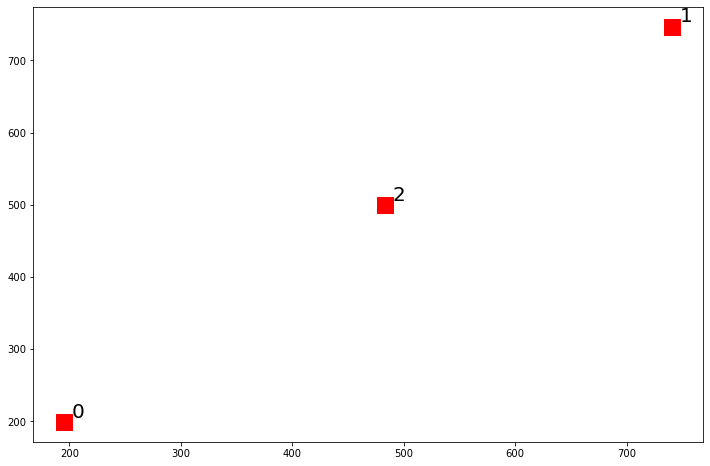

In [12]:
# we visualize the centroids of the 3 clusters
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(centroids[:,0], centroids[:,1], c ='r', s=250, marker ='s')
for i in range (len(centroids)):
    plt.annotate(i,(centroids[i][0]+7,centroids[i][1]+7,), fontsize = 20)

### Evaluation Metrics 

In [15]:
print("Homogeneity_score:", metrics.homogeneity_score(labels,model.labels_))

print("Completeness_score:", metrics.completeness_score(labels,model.labels_))

print("V_measure_score:", metrics.v_measure_score(labels,model.labels_))

print("Adjusted_rand_score:", metrics.adjusted_rand_score(labels,model.labels_))

print("Adjusted_mutual_info_score:", metrics.adjusted_mutual_info_score(labels,model.labels_))


Homogeneity_score: 0.8544924422155967
Completeness_score: 0.8561567426912753
V_measure_score: 0.8553237828496616
Adjusted_rand_score: 0.884172129989019
Adjusted_mutual_info_score: 0.8535112289560868


###### Homogeneity_score: Clustering satisfies homogeneity if all of its cluster contain only points which are members of a single class
###### Completeness_score: Clustering satisfies completness if all of the points that are members of the same class belong to the same cluster
###### V_measure_score: Harmonic mean of homogeneity and completness score- usually used to find the average of rates
###### Adjusted_rand_score:Similarity measure between clusters which is adjusted for random labeling of data poins
###### Adjusted_mutual_info_score: Information obtained about one random variable by observing another random variable adjusted to account for chance

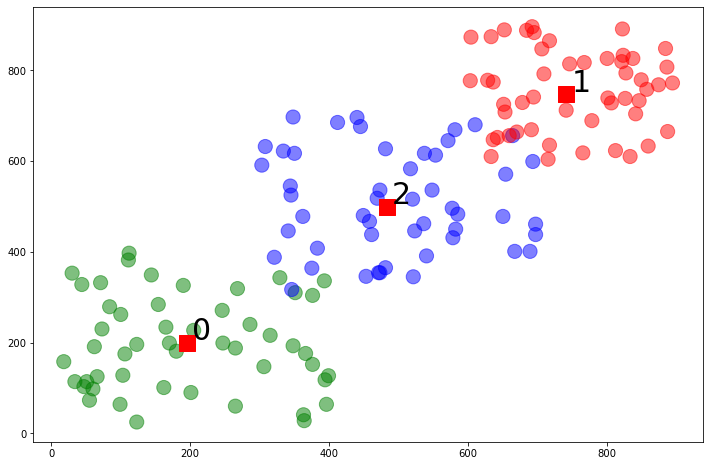

In [18]:
# visualizing the 3 clusters with the centroids generated by kmeans algorythmes
colors = ['green','blue','red']
plt.figure(figsize=(12,8))

plt.scatter(GD['data_x'],GD['data_y'], c=GD['labels'], s=200, cmap=matplotlib.colors.ListedColormap(colors), alpha =0.5)

plt.scatter(centroids[:,0], centroids[:,1], c ='r', s =250, marker ='s')

for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0]+7,centroids[i][1]+7), fontsize = 30)

In [19]:
# we pass some random data points to predict to which cluster they belong to 
data_test = np.array([[442.,624.],
                     [50.,153.],
                     [333.,373.],
                     [835.,8160]])

label_pred = model.predict(data_test)
label_pred

array([2, 0, 2, 1])

###### 1st and 3rd point belong to cluster 2 , 2nd belong to cluster 0 and last point belong to cluster 1 